# LABORATORIO MACHINE LEARNING




* Ariel Maximiliano Leyton Cubillos

### Introducción:

En este laboratorio deberá ajustar un modelo utilizando el algoritmo Naive Bayes a la base MP3.zip
encontrada junto con la tarea.
Adicionalmente, deberan ajustar los algoritmos Naive Bayes, Análisis de discriminante y regresión logística a la base Wine
anteriormente estudiada, y describir qué modelo realiza una mejor predicción.

### Objetivos:
1. Aplicar y ajustar el algortimo Naive Bayes a la base MP3.
2. Aplicar y ajustar los algortimos Naive Bayes, Análisis de Discrimintante y Regresión Logística a la base Breast Cancer.
3. Comparar los tres modelos resultantes y comparar cuál realiza una mejor predicción.

# 1. Ajuste Naive Bayes a base MP3

Este análisis se trata de un modelo de machine learning basado en el Teorema de Bayes que entrega la probabilidad de que ocurra A dado que B ha ocurrido.

P(y|X) = (P(X|y)P(y)) / P(X)

Recibe el nombre de "naive", porque asume que la presencia de una característica en particular no afecta la presencia de otras (independencia condicional de los predictores). El modelo también asume que los predictores X tienen el mismo efecto en el resultado.

El valor que asume Y en la predicción es donde se maximiza la probabilidad P(y|X)

In [68]:
import pandas as pd
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, recall_score, precision_score
from sklearn.metrics import f1_score
import os
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

Cargamos la base a partir del directorio descargado:

In [11]:
def load_data_from_directory(dir_path):
    texts, labels = [], []
    for sentiment in ['neg', 'pos']:
        sentiment_dir = os.path.join(dir_path, sentiment)
        for file_name in os.listdir(sentiment_dir):
            if file_name != '.DS_Store':
                with open(os.path.join(sentiment_dir, file_name), 'r', encoding='utf-8', errors='ignore') as file:
                    texts.append(file.read())
                    labels.append(1 if sentiment == 'pos' else 0)
    return texts, labels

dir_path = 'E:/STUDY/3. DIPLOMADO DATA SCIENCE UDD/SEGUNDO TRIMESTRE/2 MACHINE LEARNING/TALLERES/TALLER 2/MP3_data/MP3_data_zip'
train_texts, train_labels = load_data_from_directory(os.path.join(dir_path, 'train'))
test_texts, test_labels = load_data_from_directory(os.path.join(dir_path, 'dev'))

Revisamos el primer dato del dataset para verificar el tipo con el que estamos trabajando.  Dicho esto, pareciera ser un caso de análisis de sentimiento.
Adicionalmene, podemos inferir por el texto que se trata de una crítica negativa por lo que debiese tener un número **0** (0 = negativo y 1 = positivo).

In [14]:
primer_dato = train_texts[0]
primer_dato

"First of all I hate those moronic rappers, who could'nt act if they had a gun pressed against their foreheads. All they do is curse and shoot each other and acting like cliché'e version of gangsters.<br /><br />The movie doesn't take more than five minutes to explain what is going on before we're already at the warehouse There is not a single sympathetic character in this movie, except for the homeless guy, who is also the only one with half a brain.<br /><br />Bill Paxton and William Sadler are both hill billies and Sadlers character is just as much a villain as the gangsters. I did'nt like him right from the start.<br /><br />The movie is filled with pointless violence and Walter Hills specialty: people falling through windows with glass flying everywhere. There is pretty much no plot and it is a big problem when you root for no-one. Everybody dies, except from Paxton and the homeless guy and everybody get what they deserve.<br /><br />The only two black people that can act is the h

Revisamos que efectivamente cuente con ese número:

In [16]:
primer_label = train_labels[0]
primer_label

0

Cargados los datos y hecha la revisión correspondiente, podemos entrenar el modelo con los datos de train.

In [64]:
nbayes = make_pipeline(CountVectorizer(), MultinomialNB())
nbayes.fit(train_texts, train_labels)

Pipeline(steps=[('countvectorizer', CountVectorizer()),
                ('multinomialnb', MultinomialNB())])

Una buena práctica dentro del ámbito de la ciencia de datos es evaluar el modelo en los mismos datos de entrenamiento para revisar su calidad y luego probar con los datos de prueba para comparar.

#### Prueba en Train:

In [65]:
y_pred_train = nbayes.predict(train_texts)

In [66]:
accuracy_score(train_labels, y_pred_train)

0.96325

In [69]:
confusion_mat_train = confusion_matrix(train_labels, y_pred_train)
confusion_mat_train

array([[1896,  104],
       [ 190, 5810]], dtype=int64)

In [67]:
reporttrain = classification_report(train_labels, y_pred_train)

print(reporttrain)

              precision    recall  f1-score   support

           0       0.91      0.95      0.93      2000
           1       0.98      0.97      0.98      6000

    accuracy                           0.96      8000
   macro avg       0.95      0.96      0.95      8000
weighted avg       0.96      0.96      0.96      8000



#### Prueba en Test:

In [42]:
y_pred_test = nbayes.predict(test_texts)

In [43]:
accuracy_score(test_labels, y_pred_test)

0.8948

La precisión es una de las medidas más importantes.  con un **89,48%** el modelo parece tener un buen rendimiento.

In [71]:
f1_score(test_labels, y_pred_test)

0.934690836851254

In [72]:
recall_score(test_labels, y_pred_test)

0.941

El recall mide la proporción de casos positivos que fueron correctamente identificados por el modelo con respecto a todos los casos positivos reales en el conjunto de datos. Dicho esto, un porcentaje de **94.1%** es un resultado bastante bueno para el modelo evaluado.

In [44]:
reporttest = classification_report(test_labels, y_pred_test)

print(reporttest)

              precision    recall  f1-score   support

           0       0.75      0.71      0.73      1000
           1       0.93      0.94      0.93      4000

    accuracy                           0.89      5000
   macro avg       0.84      0.83      0.83      5000
weighted avg       0.89      0.89      0.89      5000



In [45]:
confusion_mat_test = confusion_matrix(test_labels, y_pred_test)
confusion_mat_test

array([[ 710,  290],
       [ 236, 3764]], dtype=int64)

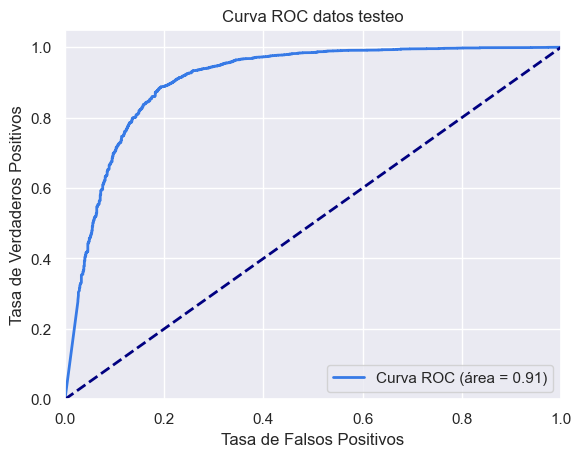

In [62]:
fpr, tpr, _ = roc_curve(test_labels, nbayes.predict_proba(test_texts)[:, 1])
roc_auc = auc(fpr, tpr)

# Plotear la curva ROC
plt.figure()
plt.plot(fpr, tpr, color='#377AE6', lw=2, label='Curva ROC (área = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC datos testeo')
plt.legend(loc="lower right")
plt.show()

In [70]:
accuracytrain = accuracy_score(train_labels, y_pred_train)
accuracytest = accuracy_score(test_labels, y_pred_test)

print(accuracytrain)
print(accuracytest)

0.96325
0.8948


Analizadas las diferentes métricas de evaluación del modelo, podemos inferir que aún puede mejorar.  A continuación un resumen de las métricas:

- **Accuracy:** 89,48%
- **F1 Score:** 93,46%
- **Recall:** 94,10%
- **Matriz de confusión:**  TP (3764), FP (290), TN (710), FN (236)
- **Curva ROC:** 0,91

## Fine-Tuning:

Puesto que conocemos las posibilidades de mejora de nuestro modelo, lo siguiente es iterar sobre las diferentes opciones para afinarlo.  Para ello ocuparemos Grid Search con el objetivo de encontrar la mejor combinación de hiperparámetros asociados a NaiveBayes:

- Vectorizador
- Valor alpha



In [50]:
param_grid = {
    'countvectorizer__ngram_range': [(1, 1), (1, 2), (1, 3)],  # Ejemplo de hiperparámetro para CountVectorizer
    'multinomialnb__alpha': [0.1, 1.0, 10.0]  # Ejemplo de hiperparámetro para MultinomialNB
}

# Crea el objeto GridSearchCV
grid_search = GridSearchCV(nbayes, param_grid, cv=5, scoring='accuracy')

# Entrena el modelo
grid_search.fit(train_texts, train_labels)

# Obtiene los mejores parámetros y el mejor estimador
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

# Evalúa el modelo en el conjunto de prueba
accuracyft = grid_search.score(test_texts, test_labels)
print(accuracyft)

0.9068


Afinado el modelo, obtuvimos una precisión del **90,68%** lo que evidencia una mejora.  A pesar de ello, se revisará cada métrica para poder hacer una comparación final.

In [52]:
best_params = grid_search.best_params_
print(best_params)

{'countvectorizer__ngram_range': (1, 2), 'multinomialnb__alpha': 0.1}


Los hiperparámetros seleccionados para poder afinar el modelo fueron los siguientes:

**countvectorizer:**  Donde (1, 2) significa que se extraerán tanto unigramas como bigramas del texto. Esto significa que el modelo considerará tanto las palabras individuales como las combinaciones de dos palabras consecutivas.

**alpha:**  Que representa al suavizado de Laplace para evitar problemas de probabilidad cero en el modelo. Un valor de 0.1 indica que se está aplicando un suavizado ligero.  Este valor es ideal puesto que uno más alto podría sesgar el resultado.

In [57]:
y_pred_ft = grid_search.predict(test_texts)

In [84]:
f1_score(test_labels, y_pred_ft)

0.9434053922759291

In [85]:
recall_score(test_labels, y_pred_ft)

0.971

In [60]:
reportft= classification_report(test_labels, y_pred_ft)

print(reportft)

              precision    recall  f1-score   support

           0       0.85      0.65      0.74      1000
           1       0.92      0.97      0.94      4000

    accuracy                           0.91      5000
   macro avg       0.88      0.81      0.84      5000
weighted avg       0.90      0.91      0.90      5000



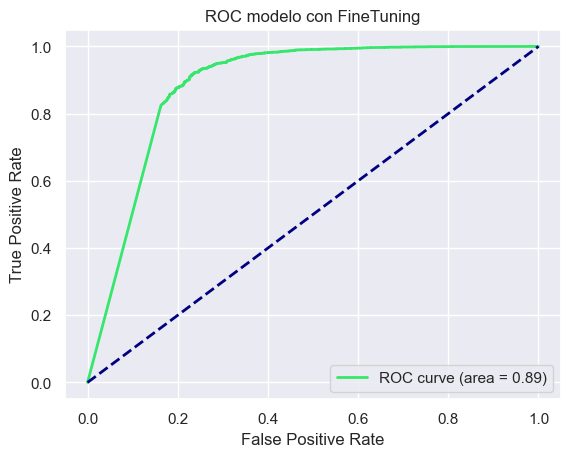

In [73]:
y_scoresft = grid_search.predict_proba(test_texts)[:, 1]

# Calcula la tasa de verdaderos positivos (TPR), la tasa de falsos positivos (FPR) y los umbrales
fpr, tpr, thresholds = roc_curve(test_labels, y_scoresft)

# Calcula el área bajo la curva ROC (AUC)
roc_auc = auc(fpr, tpr)

# Grafica la curva ROC
plt.figure()
plt.plot(fpr, tpr, color='#37E66C', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC modelo con FineTuning')
plt.legend(loc="lower right")
plt.show()

#### Métricas modelo nuevo:

- **Accuracy:** 90,68%
- **F1 Score:** 94,34%
- **Recall:** 97,10%
- **Matriz de confusión:** TP (3884), FP (350), TN (650), FN (116)
- **Curva ROC:** 0,89

### Comparación de modelos (Antiguo vs Nuevo):

Se evaluarán ambos modelos en términos de:

- Accuracy
- Recall
- F1
- Matriz de confusión
- Curvas ROC

In [76]:
print(accuracytest) #Modelo antiguo
print(accuracyft) #Modelo nuevo

0.8948
0.9068


In [78]:
recalltest = recall_score(test_labels, y_pred_test)
recallft = recall_score(test_labels, y_pred_ft)

print(recalltest)
print(recallft)

0.941
0.971


In [79]:
f1test = f1_score(test_labels, y_pred_test)
f1ft = f1_score(test_labels, y_pred_ft)

print(f1test)
print(f1ft)

0.934690836851254
0.9434053922759291


In [80]:
confusion_mat_test = confusion_matrix(test_labels, y_pred_test)
confusion_mat_test

array([[ 710,  290],
       [ 236, 3764]], dtype=int64)

In [81]:
confusion_mat_ft = confusion_matrix(test_labels, y_pred_ft)
confusion_mat_ft

array([[ 650,  350],
       [ 116, 3884]], dtype=int64)

Revisamos nuevamente la matriz, sin embargo, esta vez se utilizá un "heatmap" para visualizar mejor:

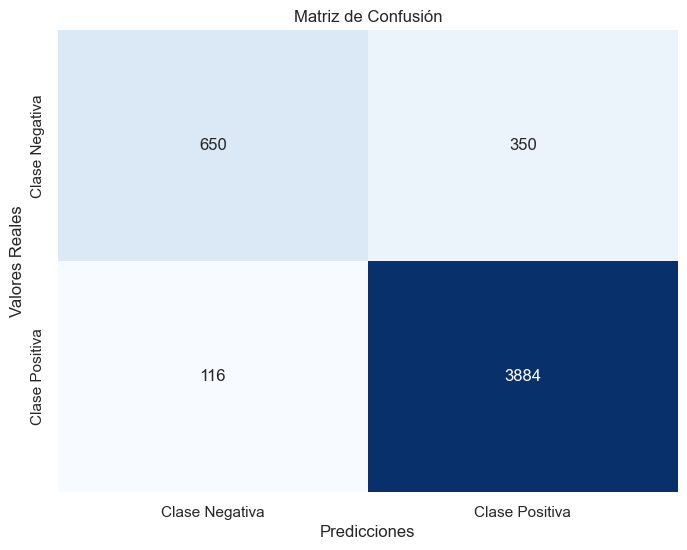

In [83]:
confusion_mat_ft = confusion_matrix(test_labels, y_pred_ft)

# Crea el mapa de calor para visualizar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat_ft, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Clase Negativa', 'Clase Positiva'], 
            yticklabels=['Clase Negativa', 'Clase Positiva'])
plt.xlabel('Predicciones')
plt.ylabel('Valores Reales')
plt.title('Matriz de Confusión')
plt.show()

Finalmente, comparamos ambas curvas ROC para ver cual se acerca más a 1 y se aleja de la línea central:

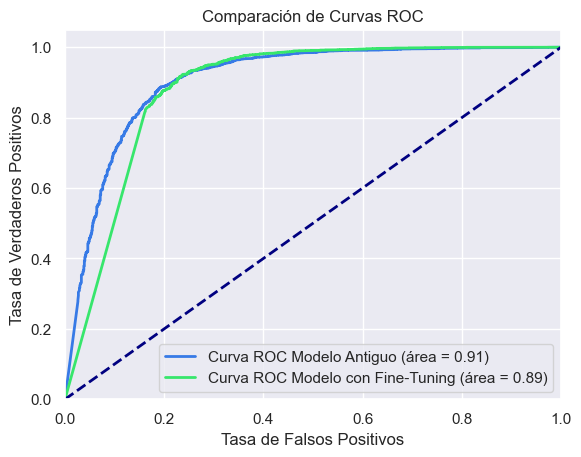

In [63]:
# Obtén las probabilidades de predicción para el modelo antiguo
y_scores_old = nbayes.predict_proba(test_texts)[:, 1]

# Calcula la tasa de verdaderos positivos (TPR) y la tasa de falsos positivos (FPR) para el modelo antiguo
fpr_old, tpr_old, _ = roc_curve(test_labels, y_scores_old)

# Calcula el área bajo la curva ROC (AUC) para el modelo antiguo
roc_auc_old = auc(fpr_old, tpr_old)

# Grafica ambas curvas ROC en un solo gráfico
plt.figure()
plt.plot(fpr_old, tpr_old, color='#377AE6', lw=2, label='Curva ROC Modelo Antiguo (área = %0.2f)' % roc_auc_old)

# Obtén las probabilidades de predicción para el modelo con Fine-Tuning
y_scores_ft = grid_search.predict_proba(test_texts)[:, 1]

# Calcula la tasa de verdaderos positivos (TPR) y la tasa de falsos positivos (FPR) para el modelo con Fine-Tuning
fpr_ft, tpr_ft, _ = roc_curve(test_labels, y_scores_ft)

# Calcula el área bajo la curva ROC (AUC) para el modelo con Fine-Tuning
roc_auc_ft = auc(fpr_ft, tpr_ft)

# Grafica la curva ROC para el modelo con Fine-Tuning
plt.plot(fpr_ft, tpr_ft, color='#37E66C', lw=2, label='Curva ROC Modelo con Fine-Tuning (área = %0.2f)' % roc_auc_ft)

# Configura la visualización del gráfico
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Comparación de Curvas ROC')
plt.legend(loc="lower right")
plt.show()


### Conclusión 1:

Después de comparar el modelo sin ajustes con el modelo afinado, podemos concluir que el último demuestra un mejor rendimiento en todas las métricas evaluadas (Accuracy, F1, Recall y Matriz de confusión), excepto en el caso de la Curva ROC. Sin embargo, la discrepancia en la Curva ROC no indica una reducción significativa en el rendimiento y puede ser atribuida a la sensibilidad de esta métrica ante la forma en que el modelo clasifica casos cercanos al umbral de decisión.

En última instancia, hemos seleccionado el nuevo modelo como el modelo final debido a la mejora notable que presenta.

# 2. Comparación de algoritmos

En este apartado se realizará la comparación de algoritmos:

* Naive Bayes
* Análisis de discriminante
* Regresión Logística

Para ello, cargaremos el dataser "**breast_cancer**" de sickitlearn y los distintos algoritmos mencionados:

In [42]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [18]:
data = load_breast_cancer()
X = data.data
y = data.target

In [19]:
X[0]

array([1.799e+01, 1.038e+01, 1.228e+02, 1.001e+03, 1.184e-01, 2.776e-01,
       3.001e-01, 1.471e-01, 2.419e-01, 7.871e-02, 1.095e+00, 9.053e-01,
       8.589e+00, 1.534e+02, 6.399e-03, 4.904e-02, 5.373e-02, 1.587e-02,
       3.003e-02, 6.193e-03, 2.538e+01, 1.733e+01, 1.846e+02, 2.019e+03,
       1.622e-01, 6.656e-01, 7.119e-01, 2.654e-01, 4.601e-01, 1.189e-01])

In [20]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

Cargado el dataset y definidias nuestras variables a analizar, separamos los datos en Train y Test en una razón **80/20** para realizar las pruebas de precisión 

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### 2.1 NaiveBayes

Este análisis se trata de un modelo de machine learning basado en el Teorema de Bayes que entrega la probabilidad de que ocurra A dado que B ha ocurrido.

P(y|X) = (P(X|y)P(y)) / P(X)

Recibe el nombre de "naive", porque asume que la presencia de una característica en particular no afecta la presencia de otras (independencia condicional de los predictores). El modelo también asume que los predictores X tienen el mismo efecto en el resultado.

El valor que asume Y en la predicción es donde se maximiza la probabilidad P(y|X)

In [22]:
naive_bayes = GaussianNB()
naive_bayes.fit(X_train, y_train)

GaussianNB()

In [23]:
nb_pred = naive_bayes.predict(X_test)

Text(110.44999999999997, 0.5, 'predicted label')

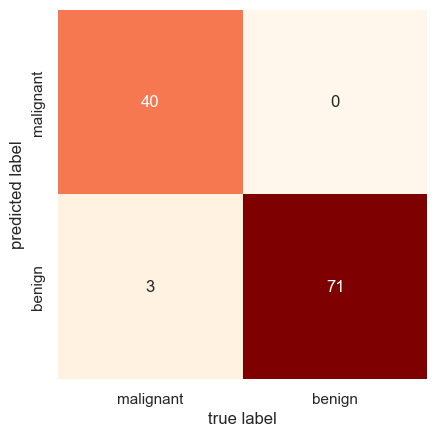

In [24]:
mat = confusion_matrix(y_test, nb_pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=load_breast_cancer().target_names, yticklabels=load_breast_cancer().target_names,
            cmap='OrRd')

plt.xlabel('true label')
plt.ylabel('predicted label')

In [25]:
nb_accuracy = accuracy_score(y_test, nb_pred)
print("Precisión de Naive Bayes:", nb_accuracy)

Precisión de Naive Bayes: 0.9736842105263158


In [26]:
recall_score(y_test, nb_pred), precision_score(y_test, nb_pred)

(1.0, 0.9594594594594594)

In [27]:
f1_score(y_test, nb_pred)

0.9793103448275862

Esto sugiere que el modelo es capaz de clasificar correctamente tanto los positivos como los negativos de manera muy efectiva.

### 2.2 Análisis de Discriminante

El análisis de discriminante lineal es una técnica de clasificación y de reducción de dimensiones. Por el lado de la clasificación, se busca una combinación lineal de las características que maximiza la distancia entre las medias de las clases y minimiza la variabilidad dentro de cada clase. Esto quiere decir que proyecta las características originales en un espacio de menor dimensión y usa dicha proyección para clasificar nuevas instancias.

Por el lado de la deducción de dimensiones, se proyectan las características originales en un espacio de menor dimensión, lo que ayuda a tener la mayor cantidad posible de la variabilidad entre las clases.

In [28]:
discriminant_analysis = LinearDiscriminantAnalysis()
discriminant_analysis.fit(X_train, y_train)

LinearDiscriminantAnalysis()

Ahora haremos la evaluación del conjunto de entrnamiento y revisaremos la matriz para constatar que el modelo no esté sobreajustando.

In [29]:
da_predTr = discriminant_analysis.predict(X_train)

In [30]:
confusion_matrix(da_predTr, y_train)

array([[153,   0],
       [ 16, 286]], dtype=int64)

Text(110.44999999999997, 0.5, 'predicted label')

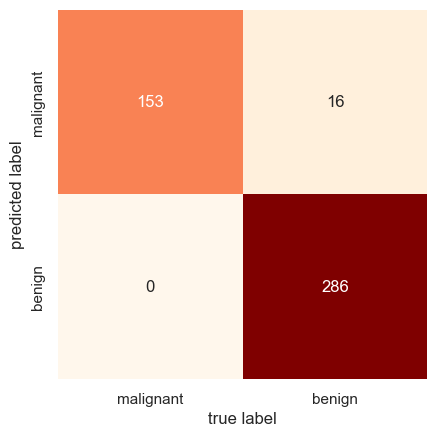

In [31]:
mat2 = confusion_matrix(da_predTr, y_train)
sns.heatmap(mat2.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=load_breast_cancer().target_names, yticklabels=load_breast_cancer().target_names,
            cmap='OrRd')

plt.xlabel('true label')
plt.ylabel('predicted label')

En primera instancia se ve todo bien.  Ahora falta compararla con la matriz de confusión del conjunto de testeo para verificar que esté todo correcto.

In [32]:
da_predTe = discriminant_analysis.predict(X_test)

In [33]:
confusion_matrix(da_predTe, y_test)

array([[39,  1],
       [ 4, 70]], dtype=int64)

Text(110.44999999999997, 0.5, 'predicted label')

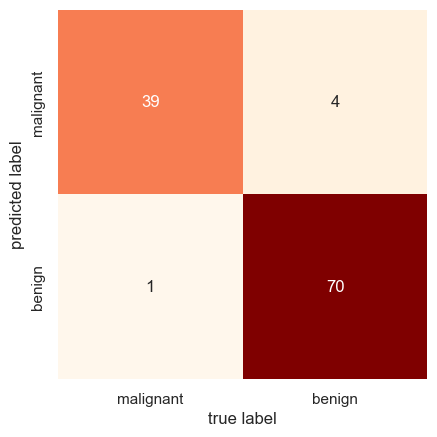

In [34]:
mat3 = confusion_matrix(da_predTe, y_test)
sns.heatmap(mat3.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=load_breast_cancer().target_names, yticklabels=load_breast_cancer().target_names,
            cmap='OrRd')

plt.xlabel('true label')
plt.ylabel('predicted label')

In [35]:
cm_train = confusion_matrix(da_predTr, y_train)

TN_train, FP_train, FN_train, TP_train = cm_train.ravel()

accuracy_train = (TP_train + TN_train) / (TP_train + TN_train + FP_train + FN_train)
error_rate_train = (FP_train + FN_train) / (TP_train + TN_train + FP_train + FN_train)

print(f"Tasa de aciertos en el conjunto de entrenamiento: {accuracy_train}")
print(f"Tasa de error en el conjunto de entrenamiento: {error_rate_train}")

Tasa de aciertos en el conjunto de entrenamiento: 0.9648351648351648
Tasa de error en el conjunto de entrenamiento: 0.035164835164835165


In [36]:
cm_test = confusion_matrix(da_predTe, y_test)

TN_test, FP_test, FN_test, TP_test = cm_test.ravel()

accuracy_test = (TP_test + TN_test) / (TP_test + TN_test + FP_test + FN_test)
error_rate_test = (FP_test + FN_test) / (TP_test + TN_test + FP_test + FN_test)

print(f"Tasa de aciertos en el conjunto de prueba: {accuracy_test}")
print(f"Tasa de error en el conjunto de prueba: {error_rate_test}")

Tasa de aciertos en el conjunto de prueba: 0.956140350877193
Tasa de error en el conjunto de prueba: 0.043859649122807015


Una vez realizado los testeos del modelo, podemos evaluar los resultados obtenidos.

**Conjunto de Entrenamiento:**

* Tasa de aciertos: 96.48%
* Tasa de error: 3.52%

**Conjunto de Prueba:**

* Tasa de aciertos: **95.61%**
* Tasa de error: 4.39%

Basándonos en los resultados obtenidos, podemos inferir que el modelo de Análisis Discriminante está bien ajustado para este problema de clasificación. La diferencia entre las tasas de aciertos en el conjunto de entrenamiento y el conjunto de prueba es pequeña, lo que indica que el modelo está generalizando bien a datos no vistos. Además, los errores en ambos conjuntos son bajos, lo que sugiere que el modelo está capturando efectivamente la relación entre las características y la variable objetivo.

Dado que no hay signos de sobreajuste ni subajuste, no se considera necesario realizar ajustes adicionales (fine-tuning).

### 2.3 Regresión Logística

Este tipo de regresión tiene como variable dependiente una variable dicotómica, de modo que el ensayo toma uno de los valores explicados por las variables independientes X. En definitiva, se modela el logaritmo de la razón de chances Pi/(1-Pi), tal que:

logit (Pi) = B0 + B1X1+...+BkXk

Donde el ajuste de los parámetros beta se hace a través de máxima verosimilitud.

In [37]:
logistic_regression = LogisticRegression(penalty =None , max_iter=10000)
logistic_regression.fit(X_train, y_train)

C:\Users\Ariel\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=10000, penalty=None)

In [38]:
lr_pred = logistic_regression.predict(X_test)

In [39]:
lr_accuracy = accuracy_score(y_test, lr_pred)
print("Precisión de Regresión Logística:", lr_accuracy)

Precisión de Regresión Logística: 0.9912280701754386


Text(110.44999999999997, 0.5, 'predicted label')

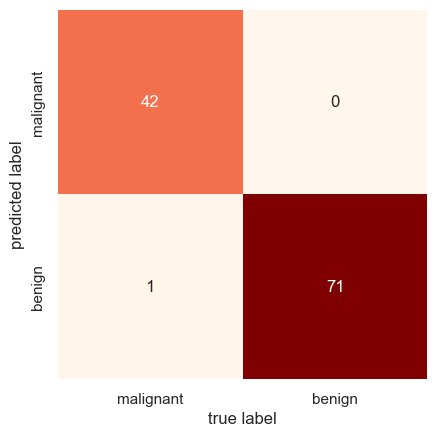

In [52]:
mat4 = confusion_matrix(y_test, lr_pred)
sns.heatmap(mat4.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=load_breast_cancer().target_names, yticklabels=load_breast_cancer().target_names,
            cmap='OrRd')

plt.xlabel('true label')
plt.ylabel('predicted label')

Evaluamos la estabilidad del modelo con una validación cruzada de 5 divisiones:

In [40]:
cv_scores = cross_val_score(logistic_regression, X_train, y_train, cv=5) 

print("Precisión de Validación Cruzada:", cv_scores)
print("Precisión Media:", cv_scores.mean())

Precisión de Validación Cruzada: [0.95604396 0.94505495 1.         0.97802198 0.93406593]
Precisión Media: 0.9626373626373625


C:\Users\Ariel\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


En promedio, el modelo de regresión logística alcanza una precisión del 96.26% en este conjunto de datos cuando se utiliza validación cruzada de 5 divisiones.  Lo anterior nos dice que tenemos un modelo de buen rendimiento (estable).

### 2.4 Comparación

Para poder elegir cuál es el modelo más preciso utilizaremos dos métodos distintos:

* Accuracy Score
* F1 Score
* Recall Score (como principal determinante dado el contexto de los datos)

#### Accuracy Score

In [ ]:
print("Precisión de Naive Bayes:", nb_accuracy)
print("Precisión de Análisis Discriminante:", da_accuracy)
print("Precisión de Regresión Logística:", lr_accuracy)

Los modelos que realizan una mejor predicción en terminos de precisión (Accuracy) son **Naive Bayes** y **Regresión Logística**.

#### Recall Score

In [44]:
recall_score(y_test, nb_pred)

1.0

In [45]:
recall_score(da_predTe, y_test)

0.9459459459459459

In [46]:
recall_score(y_test, lr_pred)

1.0

#### F1 Score

In [47]:
f1_score(y_test, nb_pred)

0.9793103448275862

In [48]:
f1_score(da_predTe, y_test)

0.9655172413793103

In [49]:
f1_score(y_test, lr_pred)

0.993006993006993

Si bien la diferencia entre Naive Bayes y Regresión logística es muy pequeña, el primero es mayor por algunas decimas lo que nos lleva a seleccionarlo cómo el modelo más preciso.

### Algo de argumentación:

Como se pudo notar a lo largo del análisis, los tres modelos revisados otorgaron un rendimiento bastante bueno en terminios de predicción.  Dicho esto, se realizaron los estudios con los siguientes hiperparámetros:

* Naive Bayes: Alpha = 0 (predeterminado por sk learn)
* Regresión logística: Sin penalización
* Análisis discriminantes: Por defecto (sklearn)

Adicionalmente y dado los resultados de los modelos, no fue necesario realizar fine-tuning (entendido como el ajuste de hiperparametros) exceptuando en la Regresión logística.

### Conclusión 2:

Después de realizar las pruebas para evaluar la precisión de los tres modelos, se concluye en primera instancia que el modelo **Naive Bayes** es el más adecuado para los datos procesados. Esta decisión se basa en la importancia del RECALL, una de las métricas cruciales en el ámbito médico, especialmente en el análisis de casos de cáncer. Es vital maximizar la detección de casos reales de cáncer.

Tanto Naive Bayes como Regresión Logística tienen un recall de 1, lo que indica que ambos identifican correctamente los casos de cáncer, Naive Bayes destaca al superar ligeramente a los otros modelos en el F1-score. Esto sugiere que el modelo logra un mejor equilibrio entre precisión y recall, lo cual es esencial en situaciones donde los falsos positivos y falsos negativos tienen implicaciones críticas.

En el contexto médico del cáncer de mamas, es crucial tener en cuenta la importancia de revisar la cantidad de casos predichos como benignos que resultan ser malignos, lo cual podría considerarse como el escenario más crítico. Por ello, la regresión logística cobra un significado considerable, ya que es el modelo que exhibe la menor tasa de Falsos Positivos (FP).

Por tanto, a pesar de que Naive Bayes muestra una ligera ventaja en términos de validación, dadas las mínimas diferencias con otros modelos y en el contexto específico que nos concierne, la elección del mejor modelo recae en la **Regresión Logística**.

### Mejor predicción: Regresión Logística.